<a href="https://colab.research.google.com/github/kruten-kp/AWS-SageMaker/blob/master/698_Assignment_2_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Causal Discovery from Observational Data

This notebook will demonstrate how the causal graph can be estimated using observational data.

The steps that we will go over in this notebook are listed below.
1.   Load necessary libraries
2.   Specify the problem
3.   Specify the data set
4.   Estimate causal graph
---


# 1. Loading the necessary libraries
---
Installation and loading of these libraries will take some time. Be patient, please.


In [2]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install(c("graph", "RBGL"))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.16 (BiocManager 1.30.19), R 4.2.2 Patched (2022-11-10
  r83330)

Installing package(s) 'BiocVersion', 'graph', 'RBGL'

also installing the dependencies ‘BiocGenerics’, ‘BH’


Old packages: 'bit', 'data.table', 'devtools', 'knitr', 'pkgbuild', 'pkgload',
  'sass', 'tidyverse', 'vctrs', 'xfun', 'boot', 'foreign'



In [3]:
install.packages("RGBL")
install.packages("ggm")
install.packages("graph")
install.packages("pcalg")
install.packages("igraph")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘RGBL’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘igraph’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘graph’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘zoo’, ‘DEoptimR’, ‘lmtest’, ‘abind’, ‘corpcor’, ‘robustbase’, ‘vcd’, ‘Rcpp’, ‘bdsmatrix’,

In [4]:

library(devtools)
library(pcalg)


Loading required package: usethis



In [5]:
BiocManager::install("Rgraphviz")
library(Rgraphviz)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.16 (BiocManager 1.30.19), R 4.2.2 Patched (2022-11-10
  r83330)

Installing package(s) 'Rgraphviz'

Old packages: 'bit', 'data.table', 'devtools', 'knitr', 'pkgbuild', 'pkgload',
  'sass', 'tidyverse', 'vctrs', 'xfun', 'boot', 'foreign'

Loading required package: graph

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdi

# We'll be Importing the data and looking at initial six rows

**Q1.Load and display the given dataset from the file.**

In [8]:

dataset <- read.csv(file = '/content/dataset.csv')
head(dataset)

,a,b,c,d,e,f,g
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.1602879,-0.2842735,0.32983527,0.5804087,0.2906598,-0.12944064,0.2792383
2,0.1674457,1.5530724,-1.68417836,0.2489186,0.2716666,0.45460244,0.5509660
3,-0.4814657,0.3189750,0.03332456,0.4408883,-0.5188648,0.03853979,-0.2532892
4,0.6796504,2.4997448,-0.62743385,0.2248806,0.6555494,0.70841191,0.1920880
5,0.7235263,-1.8291264,-1.31323171,0.7670571,-0.4029934,-0.75340742,-0.1971358
6,1.5116406,3.5580737,-1.39224342,0.9263732,1.0005635,1.01531752,1.0037764


**Q2.Use the PC algorithm to estimate an equivalence class for the given dataset. Please use 𝛼=0.05 in your conditional independence tests. Plot the graph.**

Warning message in !is.null(main) && nchar(main) > 0:
“'length(x) = 2 > 1' in coercion to 'logical(1)'”


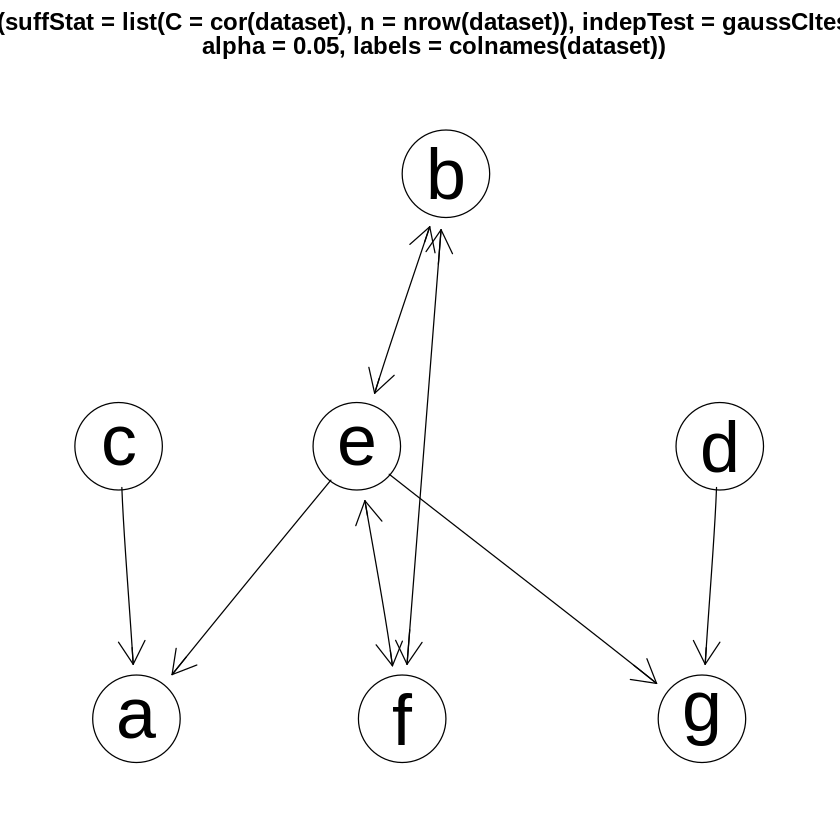

In [9]:
result.pc = pc(suffStat = list(C=cor(dataset),n=nrow(dataset)), 
                indepTest = gaussCItest, 
                labels = colnames(dataset), 
                alpha=0.05)
plot(result.pc)

**Q3. Use the GES algorithm to estimate an equivalence class for the given dataset. Plot the graph.**

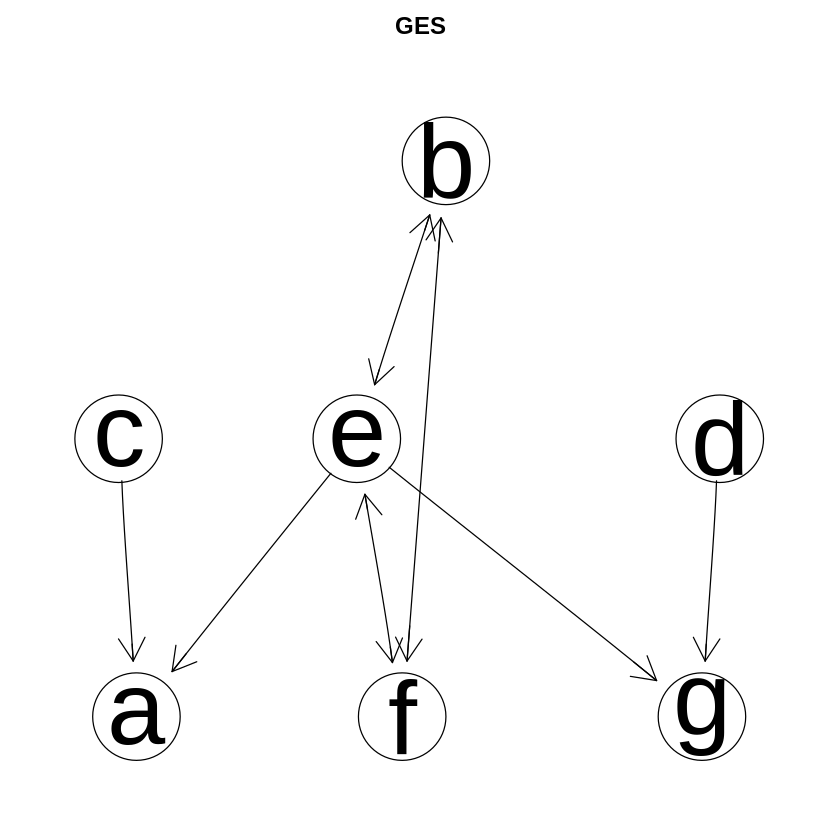

In [11]:

score_1 <- new("GaussL0penObsScore", dataset)
ges1.fit <- ges(score_1, fixedGaps = NULL, 
                adaptive = "vstructures", 
                phase = "forward", 
                maxDegree = integer(0), 
                verbose = FALSE)

plot(ges1.fit$essgraph, main = "GES",attrs=list(node=list(fontsize=20)))
